# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

In [80]:
import requests
import json
import numpy as np
import pandas as pd
def read_key(keyfile):
    with open(keyfile) as f:
        return f.readline().strip("\n")
key=read_key("key.txt")

def ndb_search(q):
    response = requests.get("https://api.nal.usda.gov/ndb/search",params ={'api_key':key,"q":q})## inport key
    response.raise_for_status()
    data=response.json()
    return response.json()["list"]["item"] ##out put item is what we need
ndb_search("orange, raw")

[{'offset': 0,
  'group': 'Fruits and Fruit Juices',
  'name': 'Oranges, raw, California, valencias',
  'ndbno': '09201',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 1,
  'group': 'Fruits and Fruit Juices',
  'name': "Oranges, raw, navels (Includes foods for USDA's Food Distribution Program)",
  'ndbno': '09202',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 2,
  'group': 'Fruits and Fruit Juices',
  'name': 'Oranges, raw, Florida',
  'ndbno': '09203',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 3,
  'group': 'Fruits and Fruit Juices',
  'name': 'Oranges, raw, with peel',
  'ndbno': '09205',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 4,
  'group': 'Fruits and Fruit Juices',
  'name': 'Tangerines, (mandarin oranges), raw',
  'ndbno': '09218',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 5,
  'group': 'Vegetables and Vegetable Products',
  'name': 'Tomatoes, orange, raw',
  'ndbno': '11695',
  'ds': 'SR',
  'manu': 'none'},
 {'offset': 6,
  'group': 'Finfish and Shellfish Products',
 

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

I use group to select the data, most fresh food are in "Fruits and Fruit Juices|Vegetables and Vegetable Products". And search them with their name plus "raw" as a whole string. most of the time the first row is what I need. I droped kiwi. At last store the result in a dictionary.

In [91]:
f=pd.read_csv('fresh.csv').food ##import food name 
fruit=list(f)
for i in range(0,48):
    fruit[i]=f[i].replace("_"," ")+", raw"## replace "_" tp " "
fruit.remove('kiwi, raw')
def getnb(x): ##get rhe ndbno form the result
    df=pd.DataFrame(ndb_search(x))
    is_vf = df["group"].str.contains("Fruits and Fruit Juices|Vegetables and Vegetable Products") ## only want fresh from the 2 type
    df2=df[is_vf]
    return df2.iloc[0]['ndbno']
dic={}## declare a data dictionary to story name and number
for x in fruit[0:48]:
    dic[x]=getnb(x)
    time.sleep(0.1)
dic


{'watermelon, raw': '09326',
 'cantaloupe, raw': '09181',
 'tangerines, raw': '09221',
 'strawberries, raw': '09316',
 'plums, raw': '09279',
 'oranges, raw': '09201',
 'raspberries, raw': '09302',
 'pomegranate, raw': '09286',
 'pineapple, raw': '09266',
 'apricots, raw': '09021',
 'honeydew, raw': '09184',
 'papaya, raw': '09226',
 'cherries, raw': '09276',
 'bananas, raw': '09040',
 'apples, raw': '09003',
 'peaches, raw': '09236',
 'nectarines, raw': '09191',
 'pears, raw': '09252',
 'grapefruit, raw': '09117',
 'blackberries, raw': '09042',
 'grapes, raw': '09129',
 'blueberries, raw': '09050',
 'mangoes, raw': '09176',
 'asparagus, raw': '11011',
 'cucumbers, raw': '11206',
 'lettuce iceberg, raw': '11252',
 'onions, raw': '11282',
 'turnip greens, raw': '11568',
 'mustard greens, raw': '11270',
 'potatoes, raw': '11362',
 'collard greens, raw': '11161',
 'green beans, raw': '11052',
 'acorn squash, raw': '11482',
 'red peppers, raw': '11821',
 'cabbage, raw': '11109',
 'sweet po

__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

In [51]:
def ndb_reportx(ndb):
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports",params ={'api_key':key,"ndbno":ndb})## inport key
    response.raise_for_status()
    nutr=response.json()["foods"][0]
    return nutr["food"]["nutrients"]
ndb_reportx("09279")

[{'nutrient_id': '255',
  'name': 'Water',
  'derivation': 'NONE',
  'group': 'Proximates',
  'unit': 'g',
  'value': '87.23',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '143.93'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '57.57'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '131.72'}]},
 {'nutrient_id': '208',
  'name': 'Energy',
  'derivation': 'NC',
  'group': 'Proximates',
  'unit': 'kcal',
  'value': '46',
  'measures': [{'label': 'cup, sliced',
    'eqv': 165.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '76'},
   {'label': 'fruit (2-1/8" dia)',
    'eqv': 66.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '30'},
   {'label': 'NLEA serving',
    'eqv': 151.0,
    'eunit': 'g',
    'qty': 1.0,
    'value': '69'}]},
 {'nutrient_id': '203',
  'name': 'Protein',
  'derivation': 'NONE',
  'group': 'Proximates',


__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

In [94]:
data=pd.read_csv('fresh.csv')

 How do the price distributions compare for fruits and vegetables?

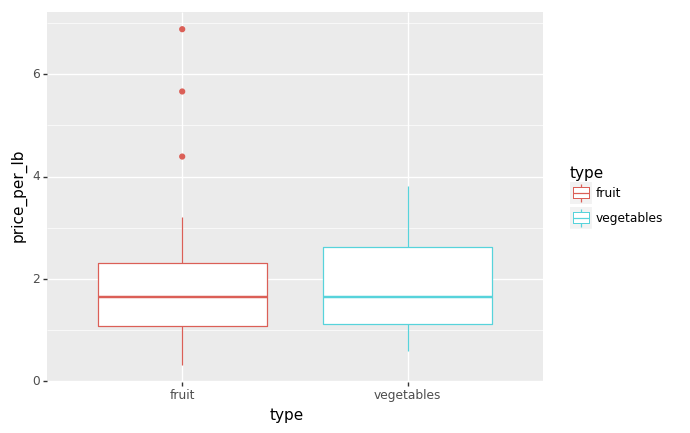

<ggplot: (-9223372036840199252)>

In [111]:
from plotnine import *
ggplot(data, aes(x = "type", y = "price_per_lb", color = "type"))+geom_boxplot()

from the graph,  I dont think they are very different

In [98]:
np.mean(data.price_per_lb[0:23])

2.115719746052174

In [99]:
np.mean(data.price_per_lb[24:48])

1.8563159688958333

From the means, fruits a more expensive

Which food provides the widest variety of nutrients?

In [ ]:
ggplot(data2, aes(x = "food", y = "kcal", color = "index",group=1)) + geom_bar()

In [204]:
dic2={}## declare a data dictionary to story name and number
for x in fruit[0:48]:
    dic2[x]=pd.DataFrame(ndb_reportx(getnb(x))).iloc[1,6]
    time.sleep(0.1)
dic2

In [213]:
data2=pd.DataFrame(dic2,index=["kcal"])

In [214]:
data2

,"watermelon, raw","cantaloupe, raw","tangerines, raw","strawberries, raw","plums, raw","oranges, raw","raspberries, raw","pomegranate, raw","pineapple, raw","apricots, raw",...,"summer squash, raw","radish, raw","butternut squash, raw","avocados, raw","kale, raw","artichoke, raw","okra, raw","green peppers, raw","brussels sprouts, raw","corn sweet, raw"
kcal,30,34,43,32,46,49,52,83,50,48,...,18,16,45,167,35,73,33,20,43,86


In [223]:
a=list(data2.loc["kcal"])
b=list(data2.columns.values)

In [224]:
c={"kcal": a, 'food': b}
data3=pd.DataFrame(c)
data3

,kcal,food
0,30,"watermelon, raw"
1,34,"cantaloupe, raw"
2,43,"tangerines, raw"
3,32,"strawberries, raw"
4,46,"plums, raw"
5,49,"oranges, raw"
6,52,"raspberries, raw"
7,83,"pomegranate, raw"
8,50,"pineapple, raw"
9,48,"apricots, raw"


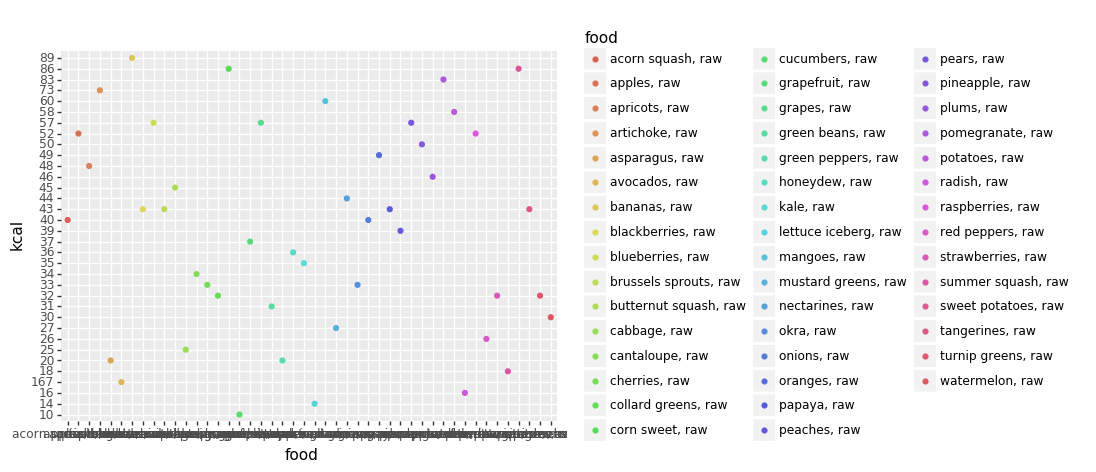

<ggplot: (14293824)>

In [232]:
ggplot(data3, aes(x = "food", y = "kcal", color = "food",group=1)) + geom_point()